In [1]:
from quantum_circuits import cnz
from grover_oracles import num_list_oracle
from quantum_circuits import index_data_cirq

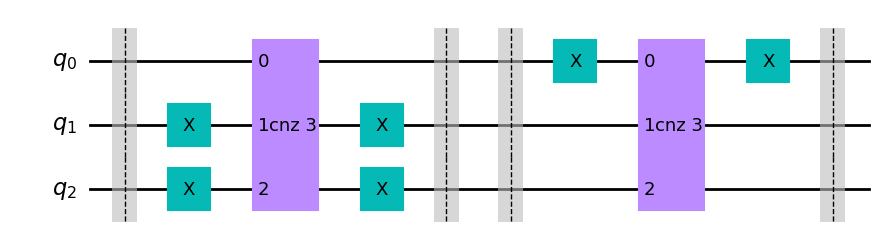

In [2]:
qc = num_list_oracle([1,6], 6, block_diagram=True)
qc.draw(output='mpl')

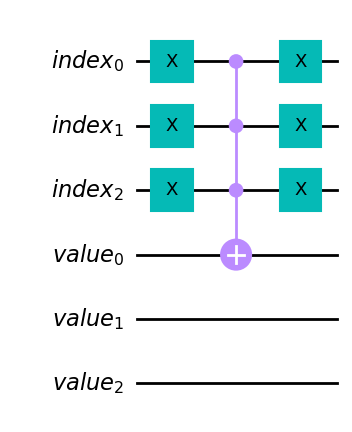

In [3]:
index_data_cirq(0, 1, 3, 3).draw('mpl')